In [345]:
import camelot as cm
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import chardet

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [585]:
base = open(r'../base_datos/sexo_dni.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']

sex_dni = pd.read_csv( r'../base_datos/sexo_dni.csv', encoding = charenc)
sex_dni 

,dni,sexo
0,940893,1
1,961093,1
2,4647843,0
3,5314738,0
4,6067235,1
...,...,...
1548,80095919,1
1549,80287733,0
1550,80347844,0
1551,80652103,0


In [592]:
base_educacion = pd.read_csv( r'../outcomes/base_completa_panel.csv')
base_educacion

,Unnamed: 0,dni,period,FC1,FC10,FC100,FC101,FC102,FC103,FC104,...,rate_approv,w_fc,w_gc,t_cre_fc,t_cre_gc,ave_gc,ave_fc,ave_total,id,signup
0,0,940893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,940893,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,236.0,87.0,16.0,6.0,14.5,14.8,14.7,1.0,1
2,1,961093,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,311.0,73.5,23.0,4.5,16.3,13.5,14.0,2.0,1
3,2,961093,2.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,1.0,260.0,64.5,18.0,4.5,14.3,14.4,14.4,2.0,1
4,3,7469182,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,206.0,58.5,16.0,4.5,13.0,12.9,12.9,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,2287,9286729,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,245.0,90.0,17.0,5.5,16.4,14.4,14.9,1.0,1
3108,2288,9694083,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3109,2288,9694083,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,267.0,91.5,17.0,5.5,16.6,15.7,15.9,1.0,1
3110,2289,9713377,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [593]:
## Base de sexo y base_educación junta

base_educacion = pd.merge(base_educacion, sex_dni, how="left", on="dni")
base_educacion['sexo'].isnull().sum() # No hay missing values. El género se asignó a todos los alumnos 
base_educacion

,Unnamed: 0,dni,period,FC1,FC10,FC100,FC101,FC102,FC103,FC104,...,w_fc,w_gc,t_cre_fc,t_cre_gc,ave_gc,ave_fc,ave_total,id,signup,sexo
0,0,940893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,0,940893,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,236.0,87.0,16.0,6.0,14.5,14.8,14.7,1.0,1,1
2,1,961093,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,311.0,73.5,23.0,4.5,16.3,13.5,14.0,2.0,1,1
3,2,961093,2.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,260.0,64.5,18.0,4.5,14.3,14.4,14.4,2.0,1,1
4,3,7469182,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.0,58.5,16.0,4.5,13.0,12.9,12.9,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,2287,9286729,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,245.0,90.0,17.0,5.5,16.4,14.4,14.9,1.0,1,0
3108,2288,9694083,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3109,2288,9694083,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,267.0,91.5,17.0,5.5,16.6,15.7,15.9,1.0,1,0
3110,2289,9713377,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [594]:
# Cantodad e cursos desaprobados y desertados por alumnno en cada periodo

base = base_educacion[~base_educacion['id'].isna()]
base0 = base[['dni','period']]
base = base.iloc[: :,3:269] # seleccionando columnas 
base = pd.concat([base0,base],axis=1)
base['Cursos desaprobados'] = ((base > 0) & (base < 12.5)).sum(axis=1)
base['Desercion de cursos'] = (base.iloc[: :,0:266] == 0).sum(axis=1)
base = base[['dni','period','Cursos desaprobados','Desercion de cursos']]
base

,dni,period,Cursos desaprobados,Desercion de cursos
1,940893,2.0,1,0
2,961093,1.0,1,0
3,961093,2.0,1,0
4,7469182,1.0,2,0
6,7877304,1.0,3,3
...,...,...,...,...
3102,80652103,1.0,1,0
3105,90035159,2.0,1,0
3107,9286729,2.0,1,0
3109,9694083,2.0,1,0


In [595]:
# Merge educacion_base + base de n° desertados y desaprobados

base_educacion = pd.merge(base_educacion,base, how = 'left', on = ['dni','period'])
base_educacion

,Unnamed: 0,dni,period,FC1,FC10,FC100,FC101,FC102,FC103,FC104,...,t_cre_fc,t_cre_gc,ave_gc,ave_fc,ave_total,id,signup,sexo,Cursos desaprobados,Desercion de cursos
0,0,940893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN
1,0,940893,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,6.0,14.5,14.8,14.7,1.0,1,1,1.0,0.0
2,1,961093,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,4.5,16.3,13.5,14.0,2.0,1,1,1.0,0.0
3,2,961093,2.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,18.0,4.5,14.3,14.4,14.4,2.0,1,1,1.0,0.0
4,3,7469182,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,4.5,13.0,12.9,12.9,1.0,1,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,2287,9286729,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,5.5,16.4,14.4,14.9,1.0,1,0,1.0,0.0
3108,2288,9694083,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0
3109,2288,9694083,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,5.5,16.6,15.7,15.9,1.0,1,0,1.0,0.0
3110,2289,9713377,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN


In [596]:
# renombrando las varaibles 

base_educacion = base_educacion.rename({'period':'Periodo', 'section':'Nivel', 'carrera':'Carrera','shift':'Turno'
                                       , 'ave_total':'Nota promedio general', 'ave_gc':'Nota promedio de cursos generales',
                                        'ave_fc':'Nota promedio de cursos de carrera','rate_approv':'ratio de aprobación por alumno'}
                                      , axis=1)

In [597]:
# Base de datos está restringida para alumnos los niveles II, IV en el semestre 2019 -2, y III,V en 2020-1

base_educacion = base_educacion[(base_educacion.Nivel > 1) & (base_educacion.Nivel < 6)]
base_educacion = base_educacion.drop(base_educacion[(base_educacion.Periodo == 1) & (base_educacion.Nivel == 5)].index)

### Tabla 1 - total de alumnos matriculados por periodo y nivel

In [598]:
# Número de alumnos por nivel y semestre

base = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Nivel'] ).size().reset_index(name='Alumnos matriculados')
base

,Periodo,Nivel,Alumnos matriculados
0,1.0,2.0,380
1,1.0,4.0,392
2,2.0,3.0,366
3,2.0,5.0,385


### Alrededor de 400 alumnos por cada nivel tanto en el periodo 2019 - 2 y 2020-1

### Figura 1 - total de alumnos matriculados por periodo y nivel

[Text(0, 0, 'Nivel II'),
 Text(1, 0, 'Nivel IV'),
 Text(2, 0, 'Nivel III'),
 Text(3, 0, 'Nivel V')]

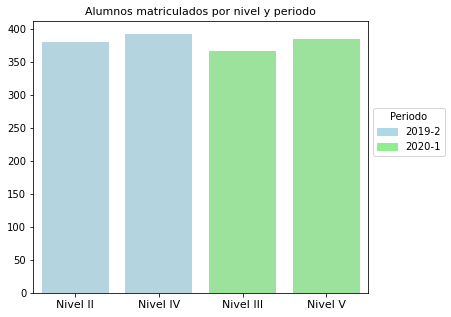

In [372]:
plt.figure(figsize=(6,5))
ax= sns.barplot( y = 'Alumnos matriculados', x = 'Nivel',
                order=[2.0,4.0,3.0,5.0], data = base, palette=['lightblue', 'lightblue', 'lightgreen', 'lightgreen'])
plt.xlabel('')
plt.ylabel('')
plt.title('Alumnos matriculados por nivel y periodo', size=11)

red_patch = mpatches.Patch(color='lightblue', label='2019-2')
blue_patch = mpatches.Patch(color='lightgreen', label='2020-1')

plt.legend(title = "Periodo", handles=[red_patch, blue_patch],  bbox_to_anchor=(1, 0.7))
(ax.set_xticklabels(["Nivel II", "Nivel IV", "Nivel III", "Nivel V"], size=11))

### No se observa una abrupta caída en la matricula para el periodo 2020-1. Más de 350 alumnos por nivel en cada periodo. 

### Tabla2 - composición de los alumnos matriculados por genero

In [373]:
base1 = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Nivel','sexo'] ).size().reset_index(name='Alumnos matriculados por sexo')
base2 = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Nivel'] ).size().reset_index(name='Alumnos matriculados')
base = pd.merge(base1, base2, how ='left', on =['Periodo','Nivel'])
base['Porcentaje de matriculados según sexo'] = base['Alumnos matriculados por sexo']/base['Alumnos matriculados']
base

,Periodo,Nivel,sexo,Alumnos matriculados por sexo,Alumnos matriculados,Porcentaje de matriculados según sexo
0,1.0,2.0,0,234,380,0.615789
1,1.0,2.0,1,146,380,0.384211
2,1.0,4.0,0,210,392,0.535714
3,1.0,4.0,1,182,392,0.464286
4,2.0,3.0,0,226,366,0.617486
5,2.0,3.0,1,140,366,0.382514
6,2.0,5.0,0,204,385,0.529870
7,2.0,5.0,1,181,385,0.470130


### Figura 2 - Gráfico de barra y composición de la matrícula según genero

Text(3, 185, '47.0%')

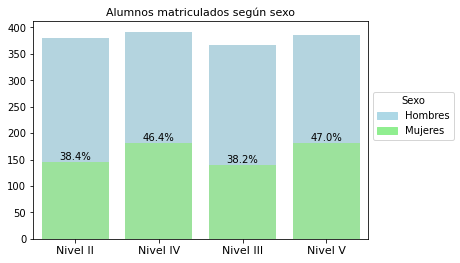

In [374]:
data2 = base[base.sexo == 1]
bar1= sns.barplot( y = 'Alumnos matriculados', x = 'Nivel', 
                   order=[2.0,4.0,3.0,5.0],
                  data = base , palette=['lightblue', 'lightblue', 'lightblue', 'lightblue'])
bar2 = sns.barplot( y = 'Alumnos matriculados por sexo', 
                    order=[2.0,4.0,3.0,5.0],
                   x = 'Nivel', data = data2 , palette=['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen'])

plt.xlabel('')
plt.ylabel('')
plt.title('Alumnos matriculados según sexo', size=11)

red_patch = mpatches.Patch(color='lightblue', label='Hombres')
blue_patch = mpatches.Patch(color='lightgreen', label='Mujeres')

plt.legend(title = "Sexo", handles=[red_patch, blue_patch],  bbox_to_anchor=(1, 0.7))
(bar1.set_xticklabels(["Nivel II", "Nivel IV", "Nivel III", "Nivel V"], size=11))

bar2.text(0,150,'38.4%',color = 'black', size = 10, ha='center')
bar2.text(1,185,'46.4%',color = 'black', size = 10, ha='center')
bar2.text(2,145,'38.2%',color = 'black', size = 10, ha='center')
bar2.text(3,185,'47.0%',color = 'black', size = 10, ha='center')

### Más de la tercera parte de los alumnos por nivel son mujeres

### Tabla 3 - matriculados por carrera

In [375]:
# Número de alumnos amtriculados por carrera y semestre

base = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Carrera'] ).size().reset_index(name='Alumnos matriculados')
base.sort_values('Carrera')

,Periodo,Carrera,Alumnos matriculados
0,1.0,Administracion de empresas,144
7,2.0,Administracion de empresas,139
1,1.0,Computacion e informatica,131
8,2.0,Computacion e informatica,127
2,1.0,Contabilidad,162
9,2.0,Contabilidad,166
3,1.0,Electrotecnia industrial,110
10,2.0,Electrotecnia industrial,102
4,1.0,Mecanica automotriz,103
11,2.0,Mecanica automotriz,101


### Figura 3

Text(0.7, 0.01, 'Alumnos matriculados restringido a los niveles II,IV (2019-2) y III,V (2020-2)')

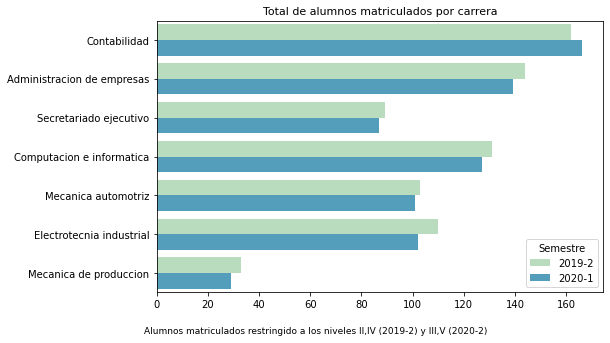

In [383]:
fig, ax = plt.subplots(figsize=(8,5))

base = base_educacion[base_educacion.signup == 1]

ax = sns.countplot(y="Carrera", hue="Periodo", data=base, palette='GnBu')

plt.legend(labels=['2019-2','2020-1'],  title = "Semestre", frameon=True)
plt.title('Total de alumnos matriculados por carrera', size=11)
plt.ylabel('')
plt.xlabel('')
txt="Alumnos matriculados restringido a los niveles II,IV (2019-2) y III,V (2020-2)"  
plt.figtext(0.7, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=9)

### A excepción de la carrera de contabilidad, se observa una menor matrícula por carrera para el 2020-1

### Tabla 4

In [602]:
base1 = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Carrera'] ).size().reset_index(name='Alumnos matriculados')

base2 = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Carrera','sexo'] ).size().reset_index(name='Alumnos matriculados por sexo')

df2 = pd.DataFrame({'Periodo' : [1.0,2.0,1.0,2.0],
                    'Carrera': ['Mecanica de produccion','Mecanica de produccion','Secretariado ejecutivo','Secretariado ejecutivo'],
                    'sexo' : [1,1,0,0],
                   'Alumnos matriculados por sexo' : [0,0,0,0]})

base2 = pd.concat([base2 , df2], ignore_index = True, axis = 0).sort_values(['Carrera','Periodo','sexo'])
base2 = pd.merge(base2, base1, how ='left', on =['Periodo','Carrera'])
base2['Porcentaje de matriculados según sexo'] = base2['Alumnos matriculados por sexo']/base2['Alumnos matriculados']
base2

,Periodo,Carrera,sexo,Alumnos matriculados por sexo,Alumnos matriculados,Porcentaje de matriculados según sexo
0,1.0,Administracion de empresas,0,51,144,3.5e-01
1,1.0,Administracion de empresas,1,93,144,6.5e-01
2,2.0,Administracion de empresas,0,52,139,3.7e-01
3,2.0,Administracion de empresas,1,87,139,6.3e-01
4,1.0,Computacion e informatica,0,93,131,7.1e-01
5,1.0,Computacion e informatica,1,38,131,2.9e-01
6,2.0,Computacion e informatica,0,90,127,7.1e-01
7,2.0,Computacion e informatica,1,37,127,2.9e-01
8,1.0,Contabilidad,0,59,162,3.6e-01
9,1.0,Contabilidad,1,103,162,6.4e-01


### Figura 4 - composición de alumnos por carrera según género

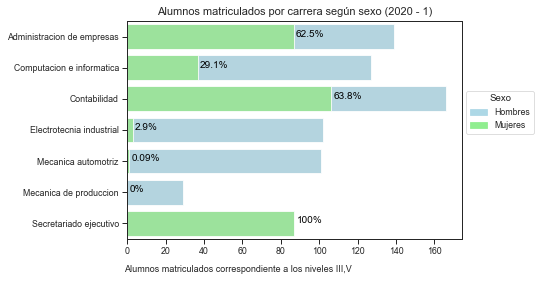

In [605]:
base1 = base1[base1.Periodo == 2]
base2 = base2[(base2.Periodo == 2) & (base2.sexo==1)]

bar1= sns.barplot( x = 'Alumnos matriculados', y = 'Carrera', 
                  data = base1 , palette=['lightblue'], ci = None)
bar2 = sns.barplot( x = 'Alumnos matriculados por sexo', y = 'Carrera',
                   data = base2 , palette=['lightgreen'], ci = None)

plt.xlabel('')
plt.ylabel('')
plt.title('Alumnos matriculados por carrera según sexo (2020 - 1)', size=11)

red_patch = mpatches.Patch(color='lightblue', label='Hombres')
blue_patch = mpatches.Patch(color='lightgreen', label='Mujeres')

plt.legend(title = "Sexo", handles=[red_patch, blue_patch],  bbox_to_anchor=(1, 0.7))
txt="Alumnos matriculados correspondiente a los niveles III,V "  
plt.figtext(0.65, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=9)

lista1 = ['62.5','29.1', '63.8', '2.9', '0.09','0','100']
lista2 = [95,45,115,10,10,5,95]

i = 0
for j in range(0,7):
    bar2.text(lista2[j],i,lista1[j]+"%",color = 'black', size = 10, ha='center')
    i = i + 1

### Las 4 carreras con presencia de mujeres, ordenados de mayor a menor presencia de mujeres, son Secretariado ejecutivo, contabilidad, Administración de empresas y computación e informática. 

### Figura 5 - nota promedio general e histograma de frecuencias-

Text(0.5, 0, '')

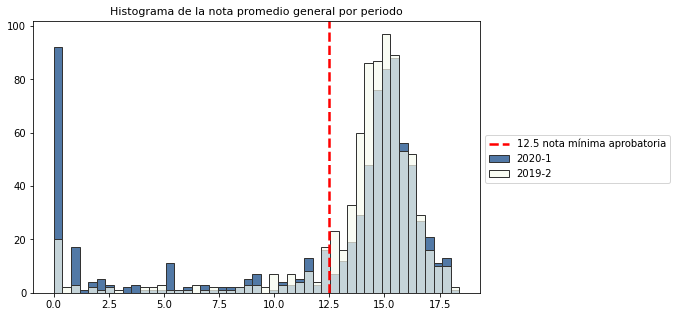

In [387]:
fig, ax = plt.subplots(figsize=(8,5))

fig = sns.histplot(data =base_educacion,
            x = 'Nota promedio general',
            alpha = 0.7,
            hue = 'Periodo',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1
            )
plt.axvline(x=12.5,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['12.5 nota mínima aprobatoria','2020-1','2019-2'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.6))
plt.title('Histograma de la nota promedio general por periodo', size=11)
plt.ylabel('')
plt.xlabel('')


## La deserción de estudiantes se multiplicó en casi 5 veces. Adicionalmente, se evidencia una mayor desaprobación.

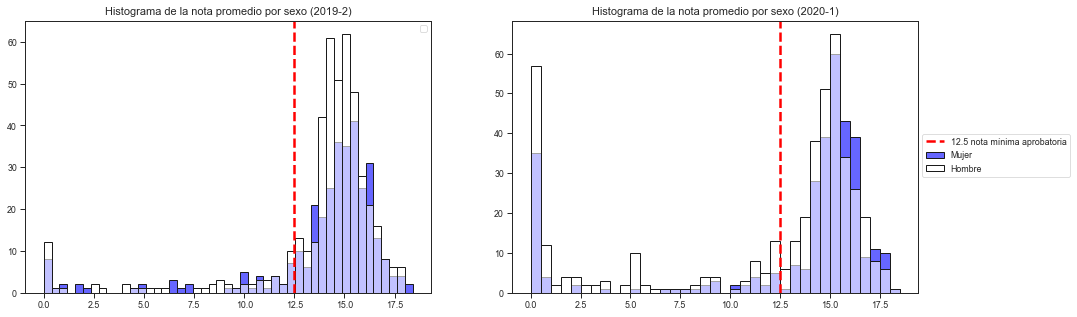

In [445]:
base1 = base_educacion[base_educacion.Periodo == 1]
base2 = base_educacion[base_educacion.Periodo == 2]

fig = plt.subplots(figsize=(16,5))

plt.subplot(121)
sns.histplot(data = base1,
            x = 'Nota promedio general',
            alpha = 0.6,
            hue = 'sexo',
            palette=['white','blue'],
            edgecolor="0.1",
            linewidth=1
            )
plt.axvline(x=12.5,
            color='red', lw=2.5, ls='--')
plt.legend('')
plt.title('Histograma de la nota promedio por sexo (2019-2)', size=11)
plt.ylabel('')
plt.xlabel('')


plt.subplot(122)
sns.histplot(data = base2,
            x = 'Nota promedio general',
            alpha = 0.6,
            hue = 'sexo',
            palette=['white','blue'],
            edgecolor="0.1",
            linewidth=1,
             binwidth=0.5
            )
plt.axvline(x=12.5,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['12.5 nota mínima aprobatoria','Mujer','Hombre'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.6))
plt.title('Histograma de la nota promedio por sexo (2020-1)', size=11)
plt.ylabel('')
plt.xlabel('')

plt.show()

### Según el indicador de nota promedio, se observa una mayor deserción de alumnos varones. Aproximadamente se multiplico más de veces 5 la cantidad de estudiantes varones que abandonaron las clases en 2020-1, en comparación a un incremento de casi 4 veces para el caso de las mujeres. 

Text(0.5, 0, '')

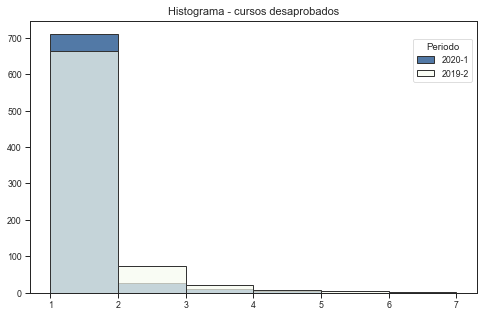

In [424]:
base = base_educacion[base_educacion['Cursos desaprobados']>0]

fig, ax = plt.subplots(figsize=(8,5))

fig = sns.histplot(data =base,
            x = 'Cursos desaprobados',
            alpha = 0.7,
            hue = 'Periodo',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1,
            binwidth= 1
            )
plt.legend(labels=['2020-1','2019-2'],  title = "Periodo", frameon=True, bbox_to_anchor=(1.0, 0.95))
plt.title('Histograma - cursos desaprobados', size=11)
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

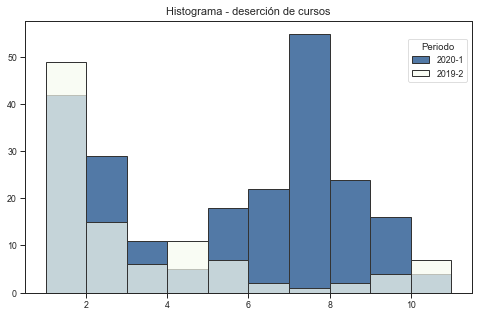

In [422]:
base = base_educacion[base_educacion['Desercion de cursos']>0]

fig, ax = plt.subplots(figsize=(8,5))

fig = sns.histplot(data =base,
            x = 'Desercion de cursos',
            alpha = 0.7,
            hue = 'Periodo',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1,
            binwidth= 1
            )
plt.legend(labels=['2020-1','2019-2'],  title = "Periodo", frameon=True, bbox_to_anchor=(1.0, 0.95))
plt.title('Histograma - deserción de cursos', size=11)
plt.ylabel('')
plt.xlabel('')


### Se evidencia un cantidad mayor de alumnos que abandonan entre 5 a 9 cursos. Esto en comparación al 2019-2. No se evidencia 

### Tabla 5 - Estadísticos descriptivos básicos

In [413]:
# Periodo 2019-2

pd.set_option('precision', 1) ## un decimal
 
base_educacion[['Nota promedio de cursos generales','Nota promedio de cursos de carrera','Nota promedio general','ratio de aprobación por alumno','Cursos desaprobados','Desercion de cursos']][base_educacion.Periodo == 1].describe()


,Nota promedio de cursos generales,Nota promedio de cursos de carrera,Nota promedio general,ratio de aprobación por alumno,Cursos desaprobados,Desercion de cursos
count,764.0,769.0,772.0,772.0,772.0,772.0
mean,14.3,13.8,13.9,0.9,1.2,0.4
std,3.5,3.6,3.4,0.2,0.6,1.5
min,0.0,0.0,0.0,0.0,1.0,0.0
25%,14.0,13.7,13.8,1.0,1.0,0.0
50%,15.0,14.7,14.7,1.0,1.0,0.0
75%,16.0,15.6,15.6,1.0,1.0,0.0
max,18.4,18.7,18.4,1.0,7.0,11.0


In [412]:
# Periodo 2020-1

pd.set_option('precision', 1) ## un decimal
 
base_educacion[['Nota promedio de cursos generales','Nota promedio de cursos de carrera','Nota promedio general','ratio de aprobación por alumno','Cursos desaprobados','Desercion de cursos']][base_educacion.Periodo == 2].describe()


,Nota promedio de cursos generales,Nota promedio de cursos de carrera,Nota promedio general,ratio de aprobación por alumno,Cursos desaprobados,Desercion de cursos
count,743.0,747.0,751.0,751.0,751.0,751.0
mean,12.2,12.1,12.1,0.8,1.1,1.5
std,5.9,5.8,5.7,0.4,0.3,2.8
min,0.0,0.0,0.0,0.0,1.0,0.0
25%,10.0,11.7,11.5,0.8,1.0,0.0
50%,15.0,14.6,14.7,1.0,1.0,0.0
75%,16.0,15.6,15.6,1.0,1.0,1.0
max,18.0,19.0,18.1,1.0,4.0,10.0


### Se observa un menor promedio en general y mayor dispersión de las notas. La nota promedio general de todos los alumnos del periodo 2020-1 es menor a la nota mínima aprobatoria. 

### Figura 4 - Diagrama de caja de las nota promedio general 

Text(0.5, 0, 'Periodo')

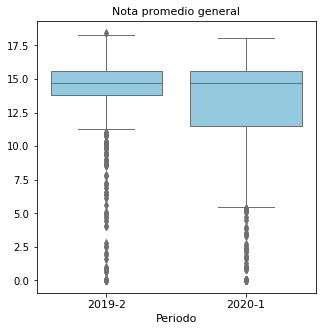

In [129]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.boxplot(x="Periodo", y="Nota promedio general",
                 data=base_educacion,
                 linewidth= 1, color="skyblue")

(ax.set_xticklabels(["2019-2", "2020-1"], size=11))
plt.title('Nota promedio general', size=11)
plt.ylabel('')
plt.xlabel('Periodo', size=11)

### Se corrobora la mayor dispersión de la nota promedio general debido a una mayor frecuencia de notas desaprobatorias. Por ello, una parte de las notas desaprobatorias dejan de ser atipicos en comparación el periodo 2019-2.

### Figura 5 - Histograma de frecuencias de la nota promedio general por carrera

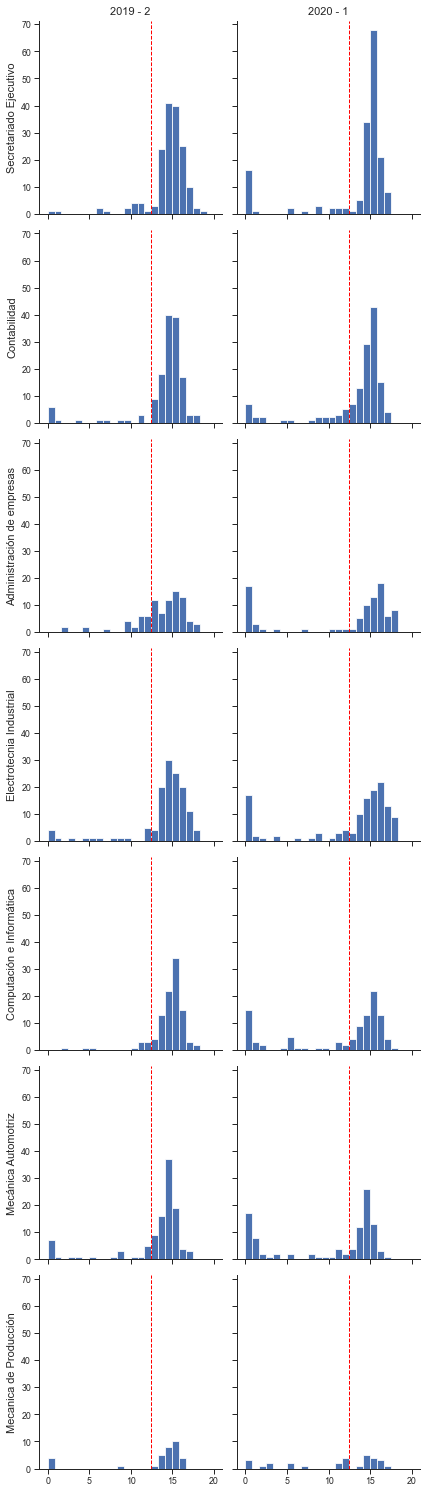

In [411]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="Carrera", col="Periodo", margin_titles=True)
grid.map(plt.hist, "Nota promedio general", bins=np.linspace(0, 20, 25), color = 'b')

for ax in grid.axes.flat:
    ax.axvline(x=12.5,color='red', lw=1, ls='--')

grid.set_titles(row_template = ' ')
axes = grid.axes.flatten()
axes[0].set_title("2019 - 2", size=11)
axes[1].set_title("2020 - 1", size=11)

careers = ['Secretariado Ejecutivo','Contabilidad','Administración de empresas', 'Electrotecnia Industrial', 
           'Computación e Informática', 'Mecánica Automotriz', 'Mecanica de Producción']
 
i = 0
j = 0

for i in range(0,14,2):
    axes[i].set_ylabel(careers[j], size=11)
    i = i+2
    j = j+1
    
for ax in axes:
    ax.set_xlabel("")

### A excepción de Mecánica de producción, se observa que todas las carreras presentan una mayor frecuencia de deserción estudiantil. 

### Tabla 4 - alumnos matriculados por carrera, periodo y turno

In [134]:
base = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Carrera','Turno'] ).size().reset_index(name='Alumnos matriculados')
base.sort_values(['Carrera','Turno'])

,Periodo,Carrera,Turno,Alumnos matriculados
0,1.0,Administracion de empresas,diurno,71
13,2.0,Administracion de empresas,diurno,64
1,1.0,Administracion de empresas,nocturno,73
14,2.0,Administracion de empresas,nocturno,75
2,1.0,Computacion e informatica,diurno,72
15,2.0,Computacion e informatica,diurno,71
3,1.0,Computacion e informatica,nocturno,59
16,2.0,Computacion e informatica,nocturno,56
4,1.0,Contabilidad,diurno,99
17,2.0,Contabilidad,diurno,96


### Figure 6 - Histograma de frecuencias y alumnos matricualdos por carrera, periodo y turno

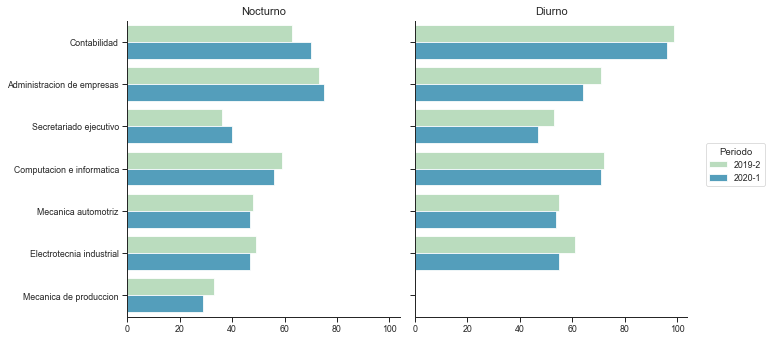

In [181]:

base = base_educacion[base_educacion.signup == 1]

ax = sns.catplot(y="Carrera", hue="Periodo", col='Turno', data=base, palette='GnBu', kind="count")

#plt.legend(labels=['2019-2','2020-1'],  title = "Periodo", frameon=True, bbox_to_anchor=(1.3, 0.6))

ax.set_titles(row_template = ' ')
axes = ax.axes.flatten()
axes[0].set_title("Nocturno", size=11)
axes[1].set_title("Diurno", size=11)

axes[0].set_ylabel('', size=11)
axes[0].set_xlabel("")
axes[1].set_xlabel("")
ax._legend.remove()
plt.legend(labels=['2019-2','2020-1'],  title = "Periodo", frameon=True, bbox_to_anchor=(1.3, 0.6))

### En general se observa una menor cantidad de alumnos matriculados en el turno diurno para el semstre 2020-1 en comparación al 2019-2. Por otro lado, en el 2020-1, se observa más alumnos matriculados en el turno noche para carreras no intensivas en equipamiento y tecnología: secretariado ejecutivo, contabilidad y administración de empresas. 

### Figura 7 y 8 - Histograma de la nota promedio general según turno

Text(0.5, 0, '')

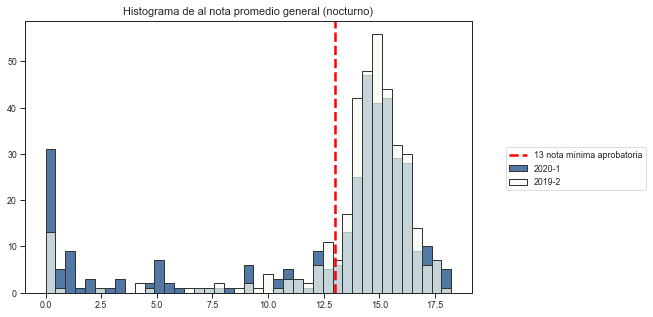

In [189]:
base1 = base_educacion[base_educacion['Turno'] == "nocturno"]

fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data = base1,
            x = 'Nota promedio general',
            alpha = 0.7,
            hue = 'Periodo',
            palette='GnBu',
            edgecolor = "0.2",
            linewidth = 1
            )

plt.axvline(x=13,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['13 nota mínima aprobatoria','2020-1','2019-2'], frameon=True, bbox_to_anchor=(1.4, 0.55))
plt.title('Histograma de al nota promedio general (nocturno)', size=11)
plt.ylabel('')
plt.xlabel('')


Text(0.5, 0, '')

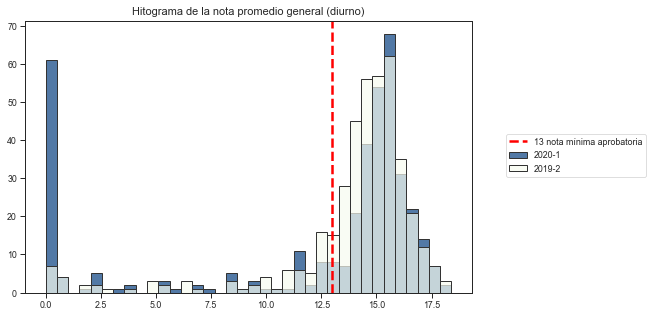

In [194]:
base1 = base_educacion[base_educacion['Turno'] == "diurno"]

fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data = base1,
            x = 'Nota promedio general',
            alpha = 0.7,
            hue = 'Periodo',
            palette='GnBu',
            edgecolor = "0.2",
            linewidth = 1
            )

plt.axvline(x=13,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['13 nota mínima aprobatoria','2020-1','2019-2'], frameon=True, bbox_to_anchor=(1.4, 0.6))
plt.title('Hitograma de la nota promedio general (diurno)', size=11)
plt.ylabel('')
plt.xlabel('')

### Se evidencia una mayor desersión de estudiantes en el turno diurno o de día, pero más alumnos desaprobados en el turno noche. 

### Tabla 5 - deserción de estudiantes por periodo

In [198]:
base2 = base_educacion[(base_educacion["Nota promedio general"] == 0)].groupby( [ 'Periodo'] ).size().reset_index(name='Total de alumnos retirados')
base2 

,Periodo,Total de alumnos retirados
0,1.0,20
1,2.0,92


### Tabla 6 - deserción de estudiantes por carrera

In [533]:
# enrolled student by carrer
base2 = base_educacion[(base_educacion["Nota promedio general"] == 0)].groupby( [ 'Carrera', 'Periodo'] ).size().reset_index(name='Total de alumnos retirados')

df2 = pd.DataFrame({'Carrera': ['Mecanica automotriz','Secretariado ejecutivo'],
                    'Periodo' : [1.0,1.0],
                    'Total de alumnos retirados' : [0,0]})

base2  = pd.concat([base2 , df2], ignore_index = True, axis = 0).sort_values(['Carrera','Periodo'])

base2 

,Carrera,Periodo,Total de alumnos retirados
0,Administracion de empresas,1.0,6
1,Administracion de empresas,2.0,7
2,Computacion e informatica,1.0,4
3,Computacion e informatica,2.0,17
4,Contabilidad,1.0,1
5,Contabilidad,2.0,16
6,Electrotecnia industrial,1.0,5
7,Electrotecnia industrial,2.0,17
12,Mecanica automotriz,1.0,0
8,Mecanica automotriz,2.0,15


### Tabla 7 - Deserción por carrera y periodo

In [637]:

base2 = base_educacion[(base_educacion['Nota promedio general'] == 0)].groupby( [ 'Carrera','Periodo'] ).size().reset_index(name='Total de alumnos retirados')
base3 =  base_educacion[(base_educacion.signup == 1)].groupby( [ 'Carrera', 'Periodo'] ).size().reset_index(name='Alumnos matriculados')
base = pd.merge(base2,base3, on = ['Carrera','Periodo'])
base['Tasa de deserción(%)'] = ((base['Total de alumnos retirados']/base['Alumnos matriculados'])*100).astype(float)
base

df2 = pd.DataFrame({'Carrera': ['Mecanica automotriz','Secretariado ejecutivo'],
                    'Periodo' : [1.0,1.0],
                    'Total de alumnos retirados' : [0,0],
                    'Tasa de deserción(%)' : [0,0],
                   'Alumnos matriculados' : [0,0]})

base = pd.concat([base , df2], ignore_index = True, axis = 0).sort_values(['Carrera','Periodo'])

base

,Carrera,Periodo,Total de alumnos retirados,Alumnos matriculados,Tasa de deserción(%)
0,Administracion de empresas,1.0,6,144,4.2
1,Administracion de empresas,2.0,7,139,5.0
2,Computacion e informatica,1.0,4,131,3.1
3,Computacion e informatica,2.0,17,127,13.4
4,Contabilidad,1.0,1,162,0.6
5,Contabilidad,2.0,16,166,9.6
6,Electrotecnia industrial,1.0,5,110,4.5
7,Electrotecnia industrial,2.0,17,102,16.7
12,Mecanica automotriz,1.0,0,0,0.0
8,Mecanica automotriz,2.0,15,101,14.9


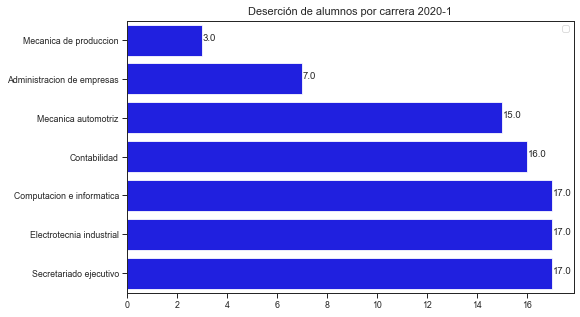

In [649]:
base = base[base.Periodo == 2]
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(y="Carrera", x ='Total de alumnos retirados', hue="Periodo", data=base, palette=['blue'],
                order=base.sort_values('Total de alumnos retirados').Carrera)

#plt.legend(labels=['Hombre','Mujer'],  title = "Sexo")
plt.title('Deserción de alumnos por carrera 2020-1', size=11)
plt.ylabel('')
plt.xlabel('')
show_values(ax, "h")

plt.legend('')

### En términos absolutos, la carreras con mayor numero de estudiantes que abandonan las clases son tres: computación, electrotecnia industrial y secretariado ejecutivo.

In [559]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

### Figura 9 - Tasa de deserción por carrera y periodo

Text(6.5, 3, '     * Tasa de deserción del 2020-1 (rojo)')

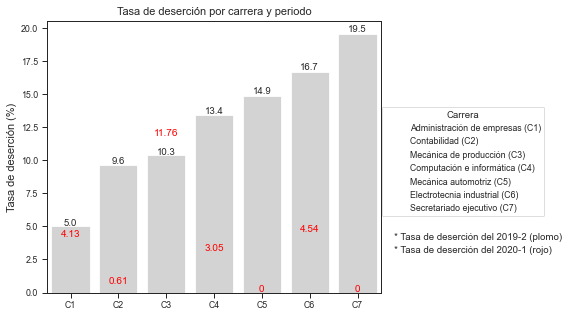

In [579]:
base = base[base.Periodo == 2]

plt.figure(figsize=(6,5))
ax = sns.barplot(x="Carrera", y="Tasa de deserción(%)", data=base, color = 'lightgray', ci = None,
                order=base.sort_values('Tasa de deserción(%)').Carrera)

careers1 = ['C1','C2','C3', 'C4','C5', 'C6', 'C7']
#careers2 = ['Administración de empresas (C1)','Contabilidad (C2)','Mecánica de producción (C3)', 
            #'Computación e informática (C4)','Mecánica automotriz (C5)', 'Electrotecnia industrial (C6)', 'Secretariado ejecutivo (C7)']

(ax.set_xticklabels(careers1))
plt.xlabel('')
plt.ylabel('Tasa de deserción (%)', size=11)
plt.title('Tasa de deserción por carrera y periodo', size=11)
#plt.legend(title='Carrera', loc='upper right', labels=careers2, bbox_to_anchor=(1.5, 0.7), ncol=1)
show_values(ax)

des_rate19 = [4.13,0.61, 11.76, 3.05, 0, 4.54,0]

j = 0
for i in des_rate19:
    ax.text(j,i+0.1,i, color = 'red', size = 10, ha='center')
    j = j +1

#"ch:.25"

# add note
c1= mpatches.Patch(color='white', label='Administración de empresas (C1)')
c2 = mpatches.Patch(color='white', label='Contabilidad (C2)')
c3 = mpatches.Patch(color='white',label='Mecánica de producción (C3)')
c4 = mpatches.Patch(color='white', label='Computación e informática (C4)')
c5= mpatches.Patch(color='white', label='Mecánica automotriz (C5)')
c6 = mpatches.Patch(color='white', label='Electrotecnia industrial (C6)')
c7 = mpatches.Patch(color='white', label='Secretariado ejecutivo (C7)')

plt.legend(title = "Carrera", handles=[c1,c2,c3,c4,c5,c6,c7], bbox_to_anchor=(1.5, 0.7), ncol=1)

ax.annotate('     * Tasa de deserción del 2019-2 (plomo)', xy = (6.5, 4))
ax.annotate('     * Tasa de deserción del 2020-1 (rojo)', xy = (6.5, 3))

###  Se observa una mayor tasa de deserción de estudiantes en los cursos intensicos en equipamiento y tecnología. Sin embargo, la carrera de secretariado ejecutivo muestra la mayor deserción de estudiantes: aproximadamente una quinta parte.

In [651]:
pd.set_option('precision', 1)

base1 = base_educacion[base_educacion["Nota promedio general"] == 0].groupby( [ 'Periodo','sexo'] ).size().reset_index(name='Total de alumnos retirados')
base2 = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','sexo'] ).size().reset_index(name='Total de alumnos matriculados')
base = pd.merge(base1,base2, how ='left', on = ['Periodo','sexo'])
base['tasa de deserción por sexo'] = base['Total de alumnos retirados']/base['Total de alumnos matriculados']*100
base

,Periodo,sexo,Total de alumnos retirados,Total de alumnos matriculados,tasa de deserción por sexo
0,1.0,0,12,444,2.7
1,1.0,1,8,328,2.4
2,2.0,0,57,430,13.3
3,2.0,1,35,321,10.9


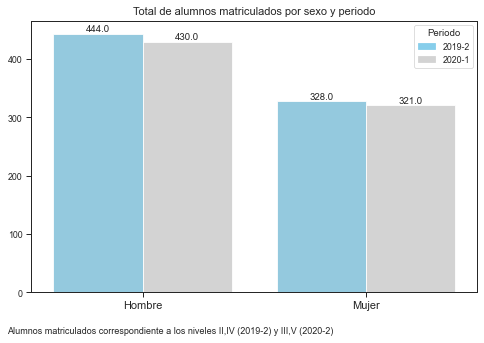

In [515]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x="sexo", y ='Total de alumnos matriculados', hue="Periodo", data=base, palette=['skyblue','lightgray'])

plt.title('Total de alumnos matriculados por sexo y periodo', size=11)
plt.ylabel('')
plt.xlabel('')
(ax.set_xticklabels(["Hombre", "Mujer"], size=11))
show_values(ax)

txt="Alumnos matriculados correspondiente a los niveles II,IV (2019-2) y III,V (2020-2)"  
plt.figtext(0.65, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=9)


red_patch = mpatches.Patch(color='skyblue', label='2019-2')
blue_patch = mpatches.Patch(color='lightgray', label='2020-1')

plt.legend(title = "Periodo", handles=[red_patch, blue_patch])

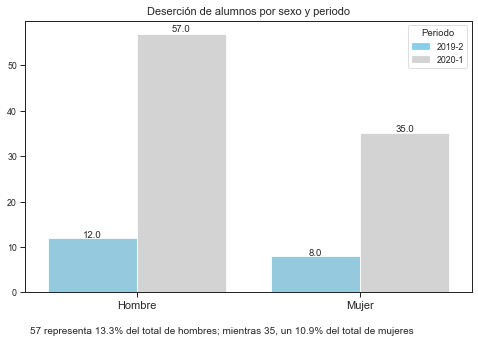

In [652]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x="sexo", y ='Total de alumnos retirados', hue="Periodo", data=base, palette=['skyblue','lightgray'])

plt.legend(labels=['2019 - 2','2020 - 1'],  title = "Sexo", frameon=True)
plt.title('Deserción de alumnos por sexo y periodo', size=11)
plt.ylabel('')
plt.xlabel('')
(ax.set_xticklabels(["Hombre", "Mujer"], size=11))
show_values(ax)

txt="57 representa 13.3% del total de hombres; mientras 35, un 10.9% del total de mujeres"  
plt.figtext(0.8, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

red_patch = mpatches.Patch(color='skyblue', label='2019-2')
blue_patch = mpatches.Patch(color='lightgray', label='2020-1')

plt.legend(title = "Periodo", handles=[red_patch, blue_patch])

### Se puede observar que la cantidad de varones que abandonaron sus clases se multiplicó por 5 veces en el 2020-1, mientras alrededor de 4 veces para el caso de las mujeres. 

In [659]:
base1 = base_educacion[(base_educacion["Nota promedio general"] == 0)].groupby( [ 'Periodo','sexo','Carrera'] ).size().reset_index(name='Total de alumnos retirados')
base2 = base_educacion[(base_educacion.signup == 1)].groupby( [ 'Periodo','sexo','Carrera','ccspec'] ).size().reset_index(name='Total de alumnos matriculados')
base = pd.merge(base1,base2, how ='right', on = ['Periodo','Carrera','sexo']).sort_values(['Carrera','Periodo'])
base['Total de alumnos retirados'] = base['Total de alumnos retirados'].replace(np.nan, 0)
base = base[(base.ccspec < 400) | ((base.ccspec > 600))]
base['tasa de deserción por sexo'] = base['Total de alumnos retirados']/base['Total de alumnos matriculados']*100

base

,Periodo,sexo,Carrera,Total de alumnos retirados,ccspec,Total de alumnos matriculados,tasa de deserción por sexo
0,1.0,0,Administracion de empresas,1.0,100.0,51,2.0
6,1.0,1,Administracion de empresas,5.0,100.0,93,5.4
12,2.0,0,Administracion de empresas,4.0,100.0,52,7.7
18,2.0,1,Administracion de empresas,3.0,100.0,87,3.4
1,1.0,0,Computacion e informatica,2.0,200.0,93,2.2
7,1.0,1,Computacion e informatica,2.0,200.0,38,5.3
13,2.0,0,Computacion e informatica,11.0,200.0,90,12.2
19,2.0,1,Computacion e informatica,6.0,200.0,37,16.2
2,1.0,0,Contabilidad,0.0,300.0,59,0.0
8,1.0,1,Contabilidad,1.0,300.0,103,1.0


Text(1, 0.01, 'Se considera las carreras con mayor presencia de mujeres. No se registra hombres matriculados en Secretariado ejecutivo')

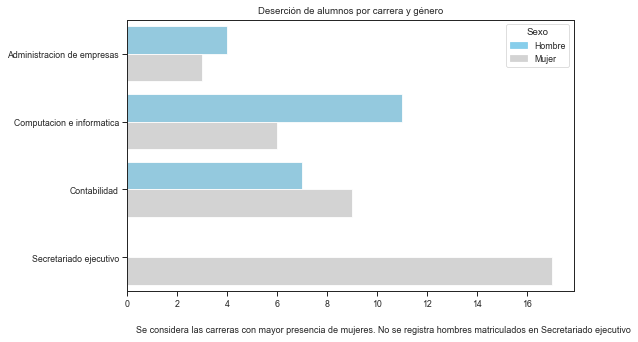

In [667]:
base = base[base.Periodo == 2]

fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(y="Carrera", x ='Total de alumnos retirados', hue="sexo", data=base, palette=['skyblue','lightgray'], order = ['Administracion de empresas', 'Computacion e informatica', 'Contabilidad','Secretariado ejecutivo'])

plt.ylabel('')
plt.xlabel('')
plt.title('Deserción de alumnos por carrera y género')
#show_values(ax)

red_patch = mpatches.Patch(color='skyblue', label='Hombre')
blue_patch = mpatches.Patch(color='lightgray', label='Mujer')

plt.legend(title = "Sexo", handles=[red_patch, blue_patch])

txt="Se considera las carreras con mayor presencia de mujeres. No se registra hombres matriculados en Secretariado ejecutivo"  
plt.figtext(1, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=9)

### En términos absolutos, la carrera de secretariado ejecutivo muestra la mayor cantidad de alumnas que abandonan las clases, seguido de contabilidad. 

### Tabla 8 - deserción de estudaintes por carrera y turno en el semestre 2020 -2 

In [250]:
base2 = base_educacion[(base_educacion["Nota promedio general"] == 0) & (base_educacion.Periodo == 2)].groupby( [ 'Carrera','Turno'] ).size().reset_index(name='Alumnos retirados')
base3 =  base_educacion[(base_educacion.Periodo == 2)].groupby( [ 'Carrera','Turno']  ).size().reset_index(name='Total de alumnos matriculados')
base4 = pd.merge(base2,base3, on = ['Carrera','Turno'])
base4['Tasa de deserción (%)'] = ((base4['Alumnos retirados']/base4['Total de alumnos matriculados'])*100).astype(float)

df2 = pd.DataFrame({'Carrera': ['Mecanica de produccion'],
                    'Turno' : ['diurno'],
                    'Alumnos retirados' : [0],
                    'Total de alumnos matriculados' : [0],
                   'Tasa de deserción (%)' : [0]})

base4 = pd.concat([base4 , df2], ignore_index = True, axis = 0).sort_values(['Carrera','Turno'])

base4

,Carrera,Turno,Alumnos retirados,Total de alumnos matriculados,Tasa de deserción (%)
0,Administracion de empresas,diurno,4,64,6.2
1,Administracion de empresas,nocturno,3,75,4.0
2,Computacion e informatica,diurno,10,71,14.1
3,Computacion e informatica,nocturno,7,56,12.5
4,Contabilidad,diurno,11,96,11.5
5,Contabilidad,nocturno,5,70,7.1
6,Electrotecnia industrial,diurno,11,55,20.0
7,Electrotecnia industrial,nocturno,6,47,12.8
8,Mecanica automotriz,diurno,11,54,20.4
9,Mecanica automotriz,nocturno,4,47,8.5


### Figura 10 - Tasa de deserción por carrera y turno en el periodo 2020-1

Text(0.5, 1.0, 'Tasa de desersiónde estudiantes (%) por turno (2020-1)')

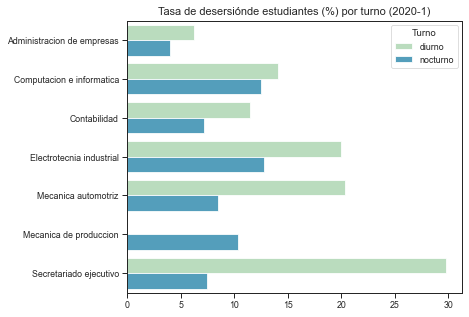

In [252]:
plt.figure(figsize=(6,5))
ax= sns.barplot( x = 'Tasa de deserción (%)', y = 'Carrera', hue= 'Turno', data = base4, palette='GnBu')
plt.xlabel('')
plt.ylabel('')
plt.title('Tasa de desersiónde estudiantes (%) por turno (2020-1)', size=11)


### El turno diurno muestra una mayor tasa de deserción

### Tabla 9 - alumnos desaprobados por periodo

In [304]:
base_educacion = base_educacion[base_educacion["Nota promedio general"]>0]

base2 = base_educacion[(base_educacion["Nota promedio general"] < 13)].groupby( [ 'Periodo'] ).size().reset_index(name='Alumnos Desaprobados')
base2
#base3 =  base_educacion[(base_educacion.Periodo == 2)].groupby( [ 'Carrera','Turno']  ).size().reset_index(name='Total de alumnos matriculados')

,Periodo,Alumnos Desaprobados
0,1.0,112
1,2.0,126


### Tabla 10 - alumnos desaprobados por periodo y carrera

In [306]:
base2 = base_educacion[(base_educacion["Nota promedio general"] < 13)].groupby( [ 'Carrera','Periodo'] ).size().reset_index(name='Alumnos Desaprobados')
base2

,Carrera,Periodo,Alumnos Desaprobados
0,Administracion de empresas,1.0,12
1,Administracion de empresas,2.0,23
2,Computacion e informatica,1.0,14
3,Computacion e informatica,2.0,18
4,Contabilidad,1.0,17
5,Contabilidad,2.0,13
6,Electrotecnia industrial,1.0,25
7,Electrotecnia industrial,2.0,27
8,Mecanica automotriz,1.0,11
9,Mecanica automotriz,2.0,23


### Se duplicó la cantidad de alumnos desaprobados en la carreras de Mecánica automotriz y administración de empresas. Secretariado ejecutivo muestra una caída importante de alumnos desaprobados a pesar de la alta cantidad de alumnos que abandoran las clases. 